## Spatial aggregation. [4 Marks]


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import scipy as spy
df = pd.read_csv(r"D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv")
state_data = pd.read_csv(r"D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\State_data.csv")
NCAP_funding = pd.read_csv(r"D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\NCAP_Funding.csv")

In [59]:
#1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

df_1 = df.dropna(subset=["PM2.5", "state"])

df_grouped = df.groupby("state")["PM2.5"].mean()

state_highest = df_grouped.idxmax()
conc_highest = df_grouped.max()

print(state_highest, conc_highest)


Delhi 104.1009176780069


In [60]:
#2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    raise ValueError("Timestamp column is not in datetime format.")

df_2023 = df.loc[
    (df['Timestamp'].dt.year == 2023) & 
    df['PM2.5'].notna() & 
    df['state'].notna()
].copy()

df_2023['Date'] = df_2023['Timestamp'].dt.date

daily_max_pm25 = df_2023.groupby(['state', 'Date'])['PM2.5'].max().reset_index()

hazardous_days_per_state = daily_max_pm25.loc[daily_max_pm25['PM2.5'] > 300].groupby('state')['Date'].count()

most_hazardous_state = hazardous_days_per_state.idxmax()
most_hazardous_days = hazardous_days_per_state.max()

print(most_hazardous_state)
print(most_hazardous_days)

Delhi
49


In [61]:
#3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    raise ValueError("Timestamp column is not in datetime format.")

df_2023 = df.loc[
    (df['Timestamp'].dt.year == 2023) & 
    df['PM2.5'].notna() & 
    df['state'].notna()
].copy()

state_pm25_variability = df_2023.groupby('state')['PM2.5'].std()

highest_variability_state = state_pm25_variability.idxmax()
highest_variability_value = state_pm25_variability.max()

print(highest_variability_state)
print(highest_variability_value)

Delhi
82.79710576209911


In [62]:
#4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

df.loc[:, 'Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df_covid_period = df.loc[(df['Timestamp'].dt.year.isin([2020, 2021])) & df['PM2.5'].notna() & df['state'].notna()].copy()

state_avg_pm25 = df_covid_period.groupby('state')['PM2.5'].mean()

lowest_pm25_state = state_avg_pm25.idxmin()
lowest_pm25_value = state_avg_pm25.min()

print(lowest_pm25_state)
print(lowest_pm25_value)

Mizoram
14.323350150801287


## Temporal Aggregation [3 Marks]


In [63]:
#1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

df.loc[:, 'Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

df_aug_2020 = df.loc[(df['Timestamp'].dt.year == 2020) & (df['Timestamp'].dt.month == 8) & df['PM2.5'].notna() & df['station'].notna()].copy()

max_pm25_station = df_aug_2020.loc[df_aug_2020['PM2.5'].idxmax(), ['station', 'PM2.5']]

print(max_pm25_station['station'])
print(max_pm25_station['PM2.5'])


Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
805.51


In [64]:
#2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

def compute_seasonal_pm25(df, station_name):
    df = df[df["station"] == station_name]
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
    df = df[df["Timestamp"].dt.year == 2018]
    df["Month"] = df["Timestamp"].dt.month
    
    seasons = {"Winter": [12, 1, 2], "Summer": [3, 4, 5], "Monsoon": [6, 7, 8, 9]}
    seasonal_avg = {season: round(float(df[df["Month"].isin(months)]["PM2.5"].mean() or 0), 2) for season, months in seasons.items()}
    
    return seasonal_avg, max(seasonal_avg, key=seasonal_avg.get)

if __name__ == "__main__":
    station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
    seasonal_avg_pm25, highest_pollution_season = compute_seasonal_pm25(df, station_name)
    print("Average PM2.5 concentration per season:")
    for season, value in seasonal_avg_pm25.items():
        print(f"{season}: {value}")
    print("Season with highest pollution:", highest_pollution_season)

Average PM2.5 concentration per season:
Winter: 67.49
Summer: nan
Monsoon: 34.43
Season with highest pollution: Winter


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23844\3728418369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")


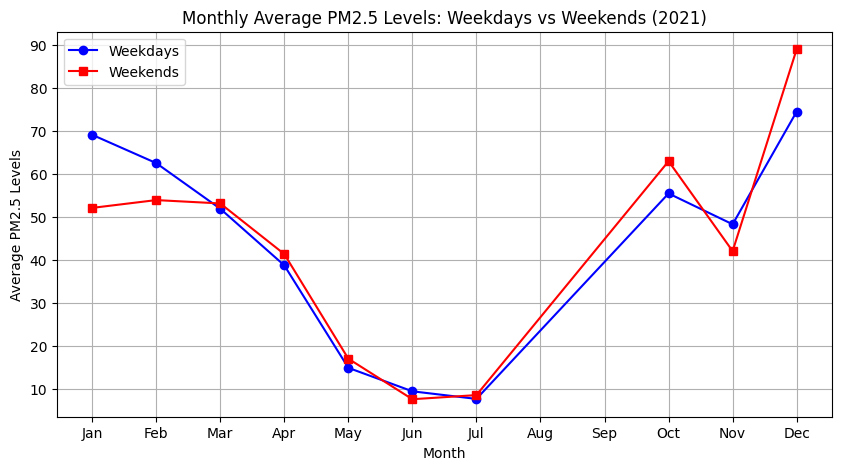

In [65]:
#3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
# a. Calculate the monthly average PM2.5 for weekdays and weekends separately
# b. X-axis: Months (January to December).
# c. Y-axis: Average PM2.5 levels.
# d. Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Filter data for the year 2021 and specific station
df_2021 = df[(df["Timestamp"].dt.year == 2021) & (df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

# Drop rows with missing PM2.5 values
df_2021 = df_2021.dropna(subset=["PM2.5"])

# Extract month and day of the week
df_2021["Month"] = df_2021["Timestamp"].dt.month
df_2021["DayOfWeek"] = df_2021["Timestamp"].dt.dayofweek

# Separate weekdays (0-4) and weekends (5-6)
df_2021["IsWeekend"] = df_2021["DayOfWeek"].apply(lambda x: 1 if x >= 5 else 0)

# Calculate monthly average PM2.5 for weekdays and weekends
weekday_avg = df_2021[df_2021["IsWeekend"] == 0].groupby("Month")["PM2.5"].mean()
weekend_avg = df_2021[df_2021["IsWeekend"] == 1].groupby("Month")["PM2.5"].mean()

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(weekday_avg.index, weekday_avg.values, marker='o', linestyle='-', label="Weekdays", color='blue')
plt.plot(weekend_avg.index, weekend_avg.values, marker='s', linestyle='-', label="Weekends", color='red')
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("Monthly Average PM2.5 Levels: Weekdays vs Weekends (2021)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid()
plt.show()



# Spacio-Temporal Aggregation

In [66]:
#1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

df_2022 = df[df["Timestamp"].dt.year == 2022]

df_2022 = df_2022.dropna(subset=["PM2.5", "state"])

df_2022["Month"] = df_2022["Timestamp"].dt.month
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

summer_avg = df_2022[df_2022["Month"].isin(summer_months)].groupby("state")["PM2.5"].mean()
monsoon_avg = df_2022[df_2022["Month"].isin(monsoon_months)].groupby("state")["PM2.5"].mean()

percentage_change = ((monsoon_avg - summer_avg) / summer_avg) * 100

most_affected_state = percentage_change.abs().idxmax()
max_difference = percentage_change[most_affected_state]

print("Percentage Change in PM2.5 Levels from Summer to Monsoon (2022) per State:")
print(percentage_change)
print(f"\nState with most change: {most_affected_state} ({max_difference:.2f}%)")

Percentage Change in PM2.5 Levels from Summer to Monsoon (2022) per State:
state
Andhra Pradesh      -35.756894
Arunachal Pradesh   -53.077110
Assam               -61.176419
Bihar               -53.000042
Chandigarh          -45.124242
Chhattisgarh        -10.975330
Delhi               -55.293579
Gujarat             -44.937747
Haryana             -48.704688
Himachal Pradesh    -37.067008
Jammu and Kashmir    -0.003063
Karnataka           -50.498558
Kerala              -14.760499
Madhya Pradesh      -56.251607
Maharashtra         -52.706658
Manipur             -48.441524
Meghalaya           -48.546662
Mizoram             -59.027533
Nagaland            -56.249827
Odisha               -6.712991
Puducherry          -22.623792
Punjab              -37.033255
Rajasthan           -46.594606
Sikkim              -51.805275
Tamil Nadu          -17.987205
Telangana           -50.160366
Tripura             -56.657734
Uttar Pradesh       -52.979157
Uttarakhand         -49.964699
West Bengal         

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv')
data.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

state_data = pd.read_csv(r"D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\State_data.csv")
state_data.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ncap_funding = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\NCAP_Funding.csv')
ncap_funding.head()

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


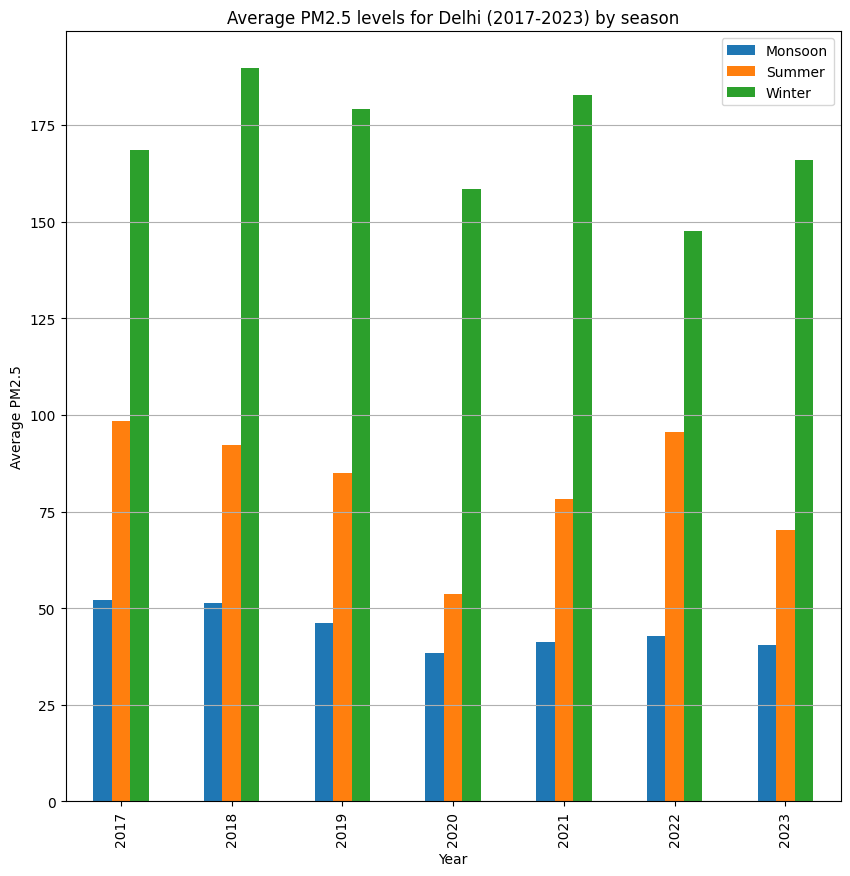

We can notice that the Average PM2.5 levels for Delhi increase in the wintertime, followed ny the Summer and lastly, the Monsoon.


In [70]:
#2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv")  
state_data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\State_data.csv')  
ncap_funding = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\NCAP_Funding.csv')  

delhi_data = data[data['state'] == 'Delhi'].copy()
delhi_data['date'] = pd.to_datetime(delhi_data['Timestamp'])

def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'

delhi_data['season'] = delhi_data['date'].dt.month.apply(season)

delhi_data = delhi_data[(delhi_data['date'].dt.year >= 2017) & (delhi_data['date'].dt.year <= 2023)]

seasonal_avg = delhi_data.groupby([delhi_data['date'].dt.year, 'season'])['PM2.5'].mean().reset_index()

seasonal_avg_pivot = seasonal_avg.pivot(index='date', columns='season', values='PM2.5')

seasonal_avg_pivot.plot(kind='bar', figsize=(10, 10))

plt.title('Average PM2.5 levels for Delhi (2017-2023) by season')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.legend()
plt.grid(axis='y')

plt.show()

print('We can notice that the Average PM2.5 levels for Delhi increase in the wintertime, followed ny the Summer and lastly, the Monsoon.')


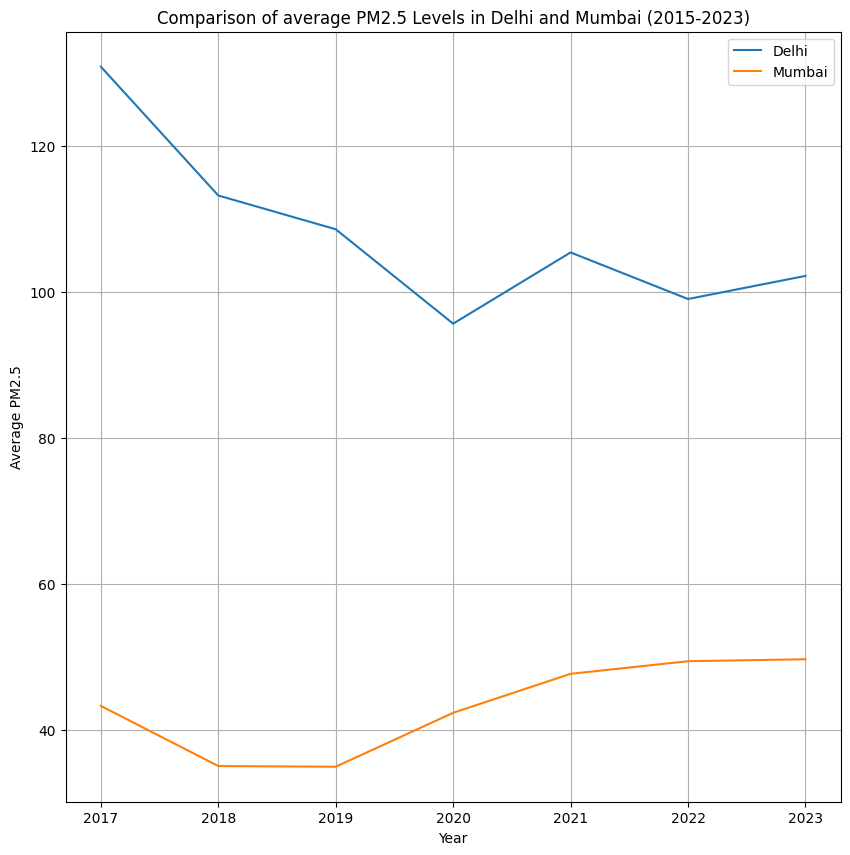

Max Fluctuation in Delhi 35.218
Max Fluctuation in Mumbai 14.728
AS we can see, Delhi had the bigger fluctuation


In [71]:
#3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv')  

delhi_data = data[data['state'] == 'Delhi'].copy()
delhi_data['date'] = pd.to_datetime(delhi_data['Timestamp'])

maharashtra_data = data[data['state'] == 'Maharashtra'].copy()
maharashtra_data['date'] = pd.to_datetime(maharashtra_data['Timestamp'])

delhi_data =  delhi_data[(delhi_data['date'].dt.year >= 2015) & (delhi_data['date'].dt.year <= 2023)]
mumbai_data = maharashtra_data[(maharashtra_data['city'] == 'Mumbai') & (maharashtra_data['date'].dt.year >= 2015) & (maharashtra_data['date'].dt.year <= 2023)]

delhi_pm25 = delhi_data.groupby(delhi_data['date'].dt.year)['PM2.5'].mean()
mumbai_pm25 = mumbai_data.groupby(mumbai_data['date'].dt.year)['PM2.5'].mean()

delhi_fluctuation = delhi_pm25.values.max() - delhi_pm25.values.min()
mumbai_fluctuation = mumbai_pm25.values.max() - mumbai_pm25.values.min()

plt.figure(figsize=(10, 10))

plt.plot( delhi_pm25.index, delhi_pm25.values, label='Delhi')
plt.plot( mumbai_pm25.index, mumbai_pm25.values, label='Mumbai')

plt.title('Comparison of average PM2.5 Levels in Delhi and Mumbai (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.grid()
plt.legend()

plt.show()

print('Max Fluctuation in Delhi',delhi_fluctuation.round(3))
print('Max Fluctuation in Mumbai', mumbai_fluctuation.round(3))

print('AS we can see, Delhi had the bigger fluctuation')

# Population Based

In [72]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv')
state_data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\State_data.csv')

monitoring_stations_per_state = data.groupby('state')['station'].nunique().reset_index()

monitoring_stations = pd.merge(monitoring_stations_per_state, state_data[['State', 'Population']], left_on='state', right_on = 'State', how='left')

monitoring_stations['stations_per_person'] = monitoring_stations['station'] / monitoring_stations['Population']

highest_ratio_state = monitoring_stations.sort_values(by='stations_per_person', ascending=False).iloc[0]

print(highest_ratio_state['state'],", with a ratio of {:.10f}.".format(highest_ratio_state['stations_per_person']))



Chandigarh , with a ratio of 0.0000028424.


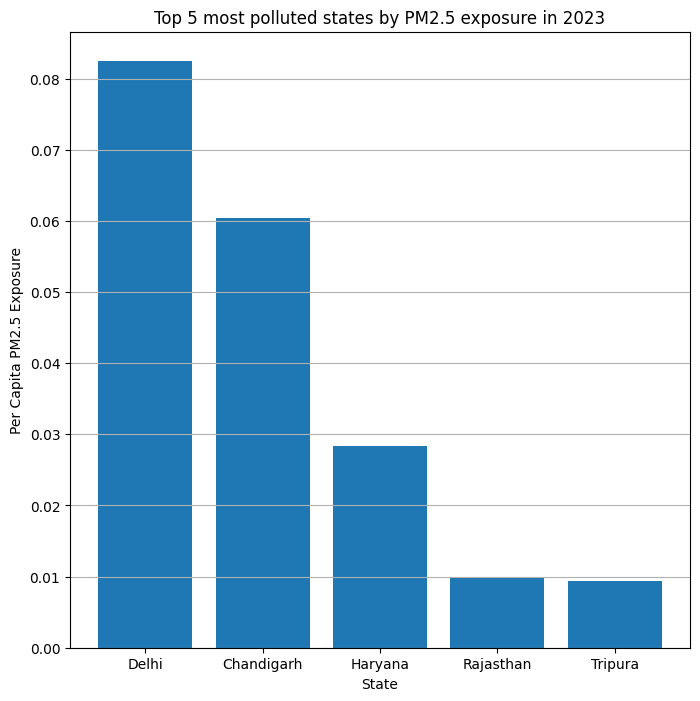

In [73]:
#2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv')
state_data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\State_data.csv')

data['timestamp'] = pd.to_datetime(data['Timestamp'])

data['year'] = data['timestamp'].dt.year

data_2023 = data[data['year'] == 2023]

total_pm25_per_state = data_2023.groupby('state')['PM2.5'].sum().reset_index()

merged_data = pd.merge(total_pm25_per_state, state_data[['State', 'Population']], left_on='state', right_on='State', how='left')

merged_data['pm25_per_capita'] = merged_data['PM2.5'] / merged_data['Population']

top_5_states = merged_data.sort_values(by='pm25_per_capita', ascending=False).head()

plt.figure(figsize=(8,8))
plt.bar(top_5_states['state'], top_5_states['pm25_per_capita'])
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.grid(axis= 'y')
plt.title('Top 5 most polluted states by PM2.5 exposure in 2023')

plt.show()


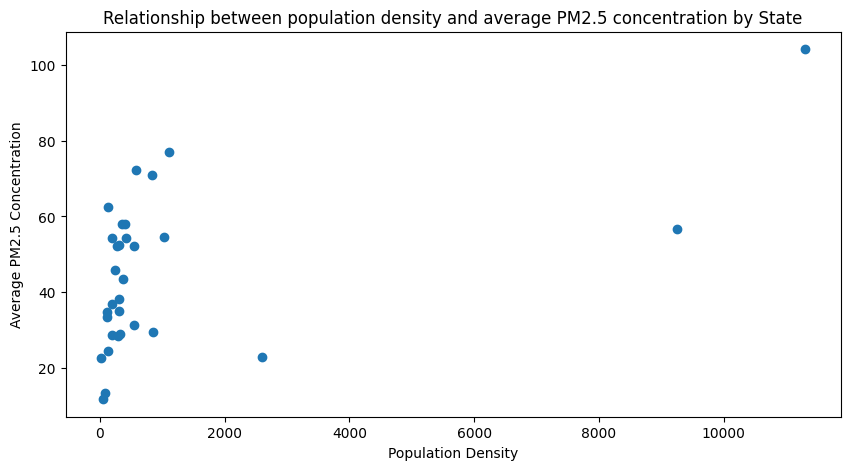

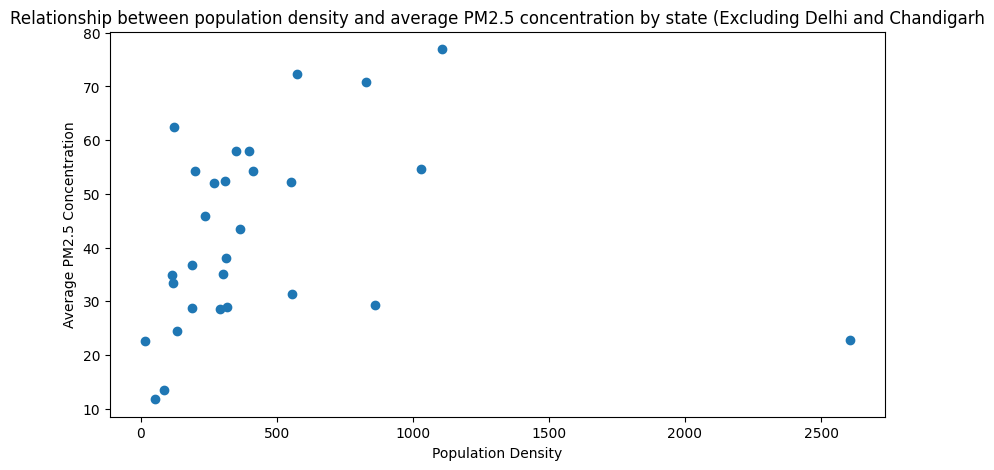

we can infer from this that bar a few outliers, it is more likely for states with higher population density to have more PM2.5 level i.e. state density is proportional to the amount of pollution.


In [74]:
#3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv')
state_data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\State_data.csv')

state_data['population_density'] = state_data['Population'] / state_data['Area (km2)']

average_pm25_per_state = data.groupby('state')['PM2.5'].mean().reset_index()

relationship = pd.merge(state_data[['State', 'population_density']], average_pm25_per_state, left_on='State', right_on='state', how='left')

plt.figure(figsize=(10,5))
plt.scatter(relationship['population_density'], relationship['PM2.5'])

plt.xlabel('Population Density')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship between population density and average PM2.5 concentration by State')

plt.show()

filtered_data = relationship[relationship['State'] != 'Delhi']
filtered_data = filtered_data[filtered_data['State'] != 'Chandigarh']

plt.figure(figsize=(10,5))
plt.scatter(filtered_data['population_density'], filtered_data['PM2.5'])

plt.xlabel('Population Density')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship between population density and average PM2.5 concentration by state (Excluding Delhi and Chandigarh')

plt.show()

print('we can infer from this that bar a few outliers, it is more likely for states with higher population density to have more PM2.5 level i.e. state density is proportional to the amount of pollution.')

# Area Based

Delhi with a value of 6673.1213590791.


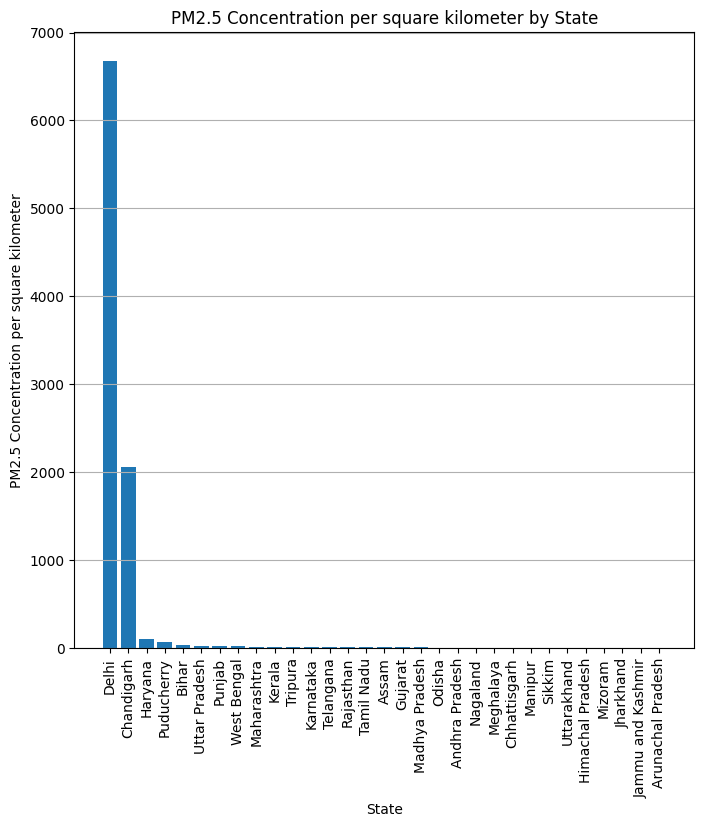

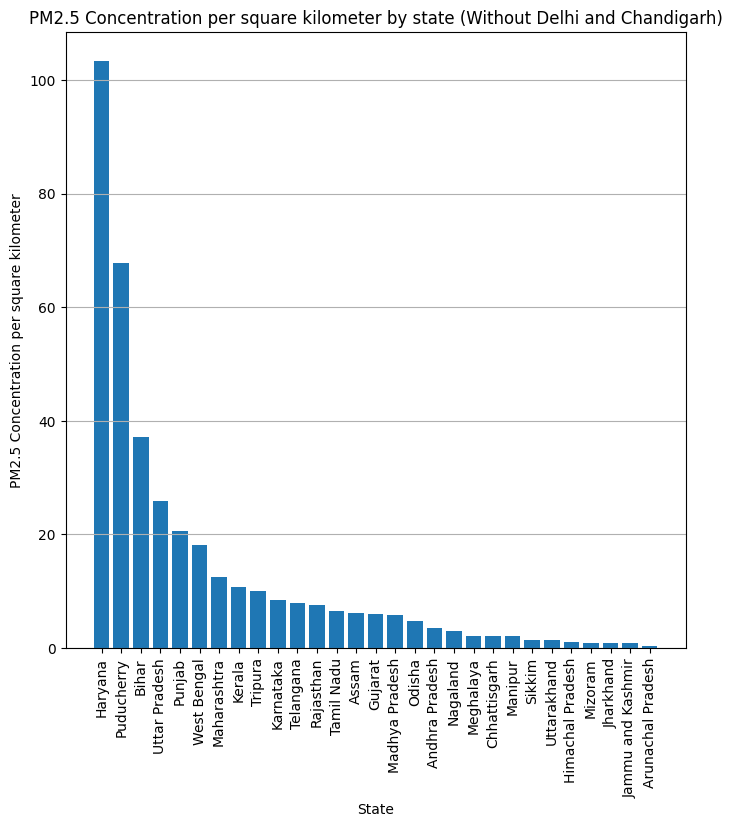

In [75]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv')
state_data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\State_data.csv')

total_pm25_per_state = data.groupby('state')['PM2.5'].sum().reset_index()

merged_data = pd.merge(total_pm25_per_state, state_data[['State', 'Area (km2)']], left_on='state', right_on='State', how='left')

merged_data['pm25_per_sq_km'] = merged_data['PM2.5'] / merged_data['Area (km2)']
sorted_data = merged_data.sort_values(by='pm25_per_sq_km', ascending=False)

highest_pm25_state = sorted_data.iloc[0]

print(f"{highest_pm25_state['state']} with a value of {highest_pm25_state['pm25_per_sq_km']:.10f}.")

plt.figure(figsize=(8, 8))
plt.bar(sorted_data['state'], sorted_data['pm25_per_sq_km'])

plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per square kilometer')
plt.title('PM2.5 Concentration per square kilometer by State')
plt.grid(axis= 'y')
plt.xticks(rotation=90)

plt.show()

filtered_data = sorted_data[sorted_data['state'] != 'Delhi']
filtered_data = filtered_data[filtered_data['state'] != 'Chandigarh']

plt.figure(figsize=(8, 8))
plt.bar(filtered_data['state'], filtered_data['pm25_per_sq_km'])

plt.xlabel('State')
plt.ylabel('PM2.5 Concentration per square kilometer')
plt.title('PM2.5 Concentration per square kilometer by state (Without Delhi and Chandigarh)')
plt.grid(axis= 'y')
plt.xticks(rotation=90)

plt.show()




The state with the highest number of monitoring stations relative to its area is Delhi with a value of 0.0269541779 stations per square kilometer.


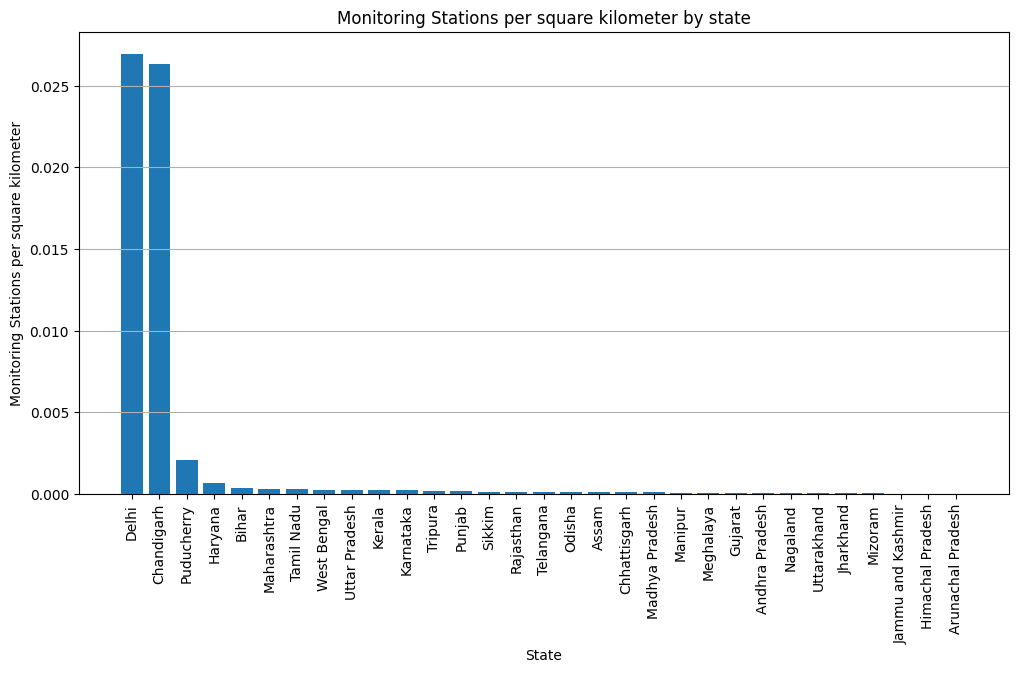

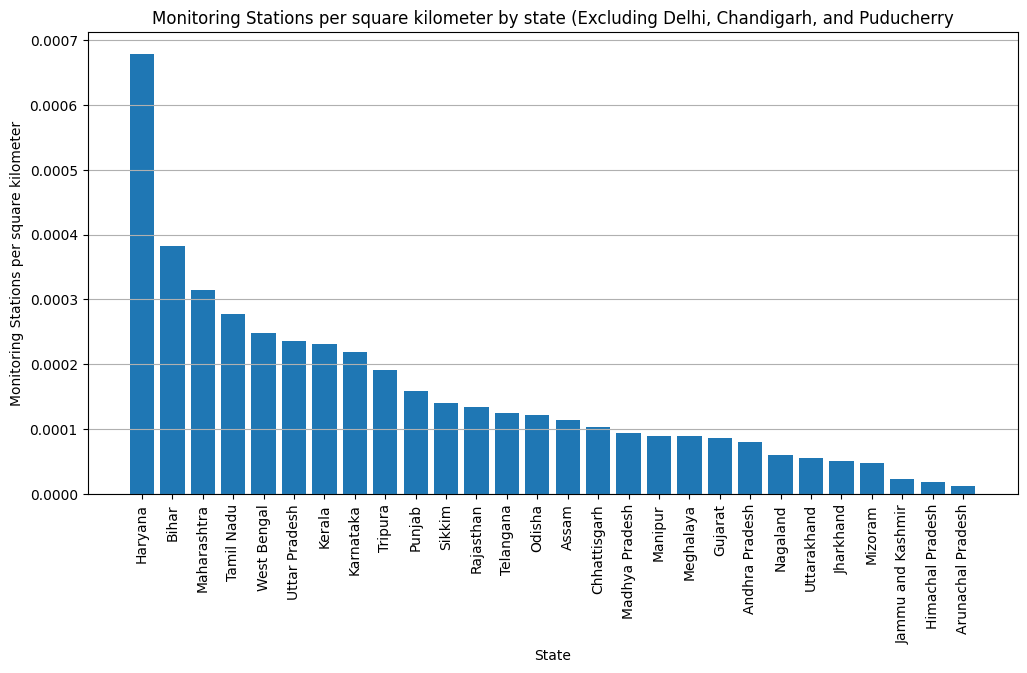

In [76]:
#2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv')
state_data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\State_data.csv')

stations_per_state = data.groupby('state')['station'].nunique().reset_index()

merged_data = pd.merge(stations_per_state, state_data[['State', 'Area (km2)']], left_on='state', right_on='State', how='left')

merged_data['stations_per_sq_km'] = merged_data['station'] / merged_data['Area (km2)']
merged_data = merged_data.sort_values(by = 'stations_per_sq_km' , ascending = False)

highest_station_density_state = merged_data.loc[merged_data['stations_per_sq_km'].idxmax()]

print("The state with the highest number of monitoring stations relative to its area is", highest_station_density_state['state'], "with a value of", round(highest_station_density_state['stations_per_sq_km'], 10), "stations per square kilometer.")

plt.figure(figsize=(12, 6))
plt.bar(merged_data['state'], merged_data['stations_per_sq_km'])

plt.xlabel('State')
plt.ylabel('Monitoring Stations per square kilometer')
plt.title('Monitoring Stations per square kilometer by state')
plt.xticks(rotation=90)
plt.grid(axis= 'y')

plt.show()

filtered_data = merged_data[merged_data['state'] != 'Delhi']
filtered_data = filtered_data[filtered_data['state'] != 'Chandigarh']
filtered_data = filtered_data[filtered_data['state'] != 'Puducherry']

plt.figure(figsize=(12, 6))
plt.bar(filtered_data['state'], filtered_data['stations_per_sq_km'])

plt.xlabel('State')
plt.ylabel('Monitoring Stations per square kilometer')
plt.title('Monitoring Stations per square kilometer by state (Excluding Delhi, Chandigarh, and Puducherry')
plt.xticks(rotation=90)
plt.grid(axis= 'y')

plt.show()

,state,PM2.5,population_density
0,Madhya Pradesh,47.095952,235.608557
1,Maharashtra,46.440044,365.192023


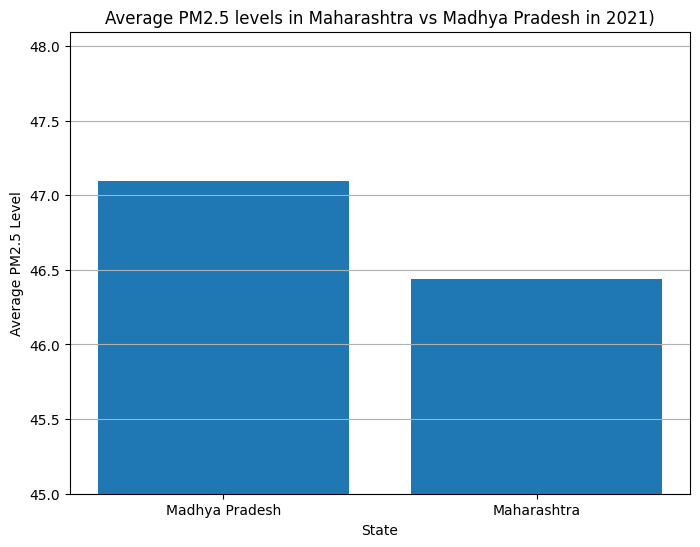

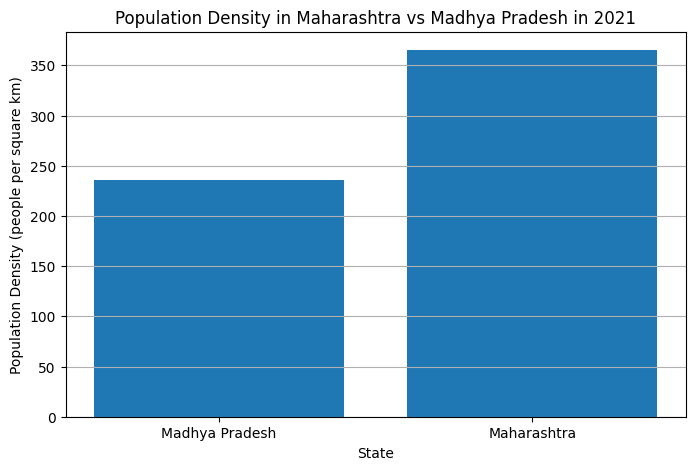

Even Though Maharashtra has higher population density, we can see that the PM2.5 levels are quite similar; in fact, Madhya Pradesh slightly eeks out Maharashtra. While I don't know the exact reason why, my guess is that Madhya Pradesh being landlocked might be a valid reason


In [77]:
#3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\Data.csv')
state_data = pd.read_csv(r'D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\State_data.csv')

data['timestamp'] = pd.to_datetime(data['Timestamp'])

data_2021 = data[data['timestamp'].dt.year == 2021]

data_filtered = data_2021[(data_2021['state'] == 'Maharashtra') | (data_2021['state'] == 'Madhya Pradesh')]

avg_pm25_per_state = data_filtered.groupby('state')['PM2.5'].mean().reset_index()

merged_data = pd.merge(avg_pm25_per_state, state_data[['State', 'Population', 'Area (km2)']], left_on='state', right_on='State', how='left')

merged_data['population_density'] = merged_data['Population'] / merged_data['Area (km2)']

display(merged_data[['state', 'PM2.5', 'population_density']])

plt.figure(figsize=(8,6))
plt.bar(merged_data['state'], merged_data['PM2.5'])

plt.xlabel('State')
plt.ylabel('Average PM2.5 Level')
plt.title('Average PM2.5 levels in Maharashtra vs Madhya Pradesh in 2021)')
plt.ylim(45, max(merged_data['PM2.5']) + 1)
plt.grid(axis= 'y')

plt.show()

plt.figure(figsize=(8, 5))
plt.bar(merged_data['state'], merged_data['population_density'])

plt.xlabel('State')
plt.ylabel('Population Density (people per square km)')
plt.title('Population Density in Maharashtra vs Madhya Pradesh in 2021')
plt.grid(axis= 'y')

plt.show()

print("Even Though Maharashtra has higher population density, we can see that the PM2.5 levels are quite similar; in fact, Madhya Pradesh slightly eeks out Maharashtra. While I don't know the exact reason why, my guess is that Madhya Pradesh being landlocked might be a valid reason")


In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
data = "D:/IIT Gandhinagar/Semester 2/ES 114/Assignement3/Data.csv"
funding = "D:/IIT Gandhinagar/Semester 2/ES 114/Assignement3/NCAP_Funding.csv"
state = "D:/IIT Gandhinagar/Semester 2/ES 114/Assignement3/State_data.csv"

## Funding Based [3 Marks]

##### Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [80]:
data_df = pd.read_csv(data)
funding_df = pd.read_csv(funding)

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")
data_2021 = data_df[data_df["Timestamp"].dt.year == 2021]

pm25_avg_by_state = data_2021.groupby("state")["PM2.5"].mean().reset_index()

funding_df_filtered = funding_df[funding_df["Amount released during FY 2021-22"] != "-"]
funded_states = set(funding_df_filtered["State"].str.strip())

pm25_avg_by_state["NCAP_Funded"] = pm25_avg_by_state["state"].str.strip().isin(funded_states)

pm25_comparison = pm25_avg_by_state.groupby("NCAP_Funded")["PM2.5"].mean()

print(pm25_comparison)

NCAP_Funded
False    40.676853
True     49.251559
Name: PM2.5, dtype: float64


##### Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


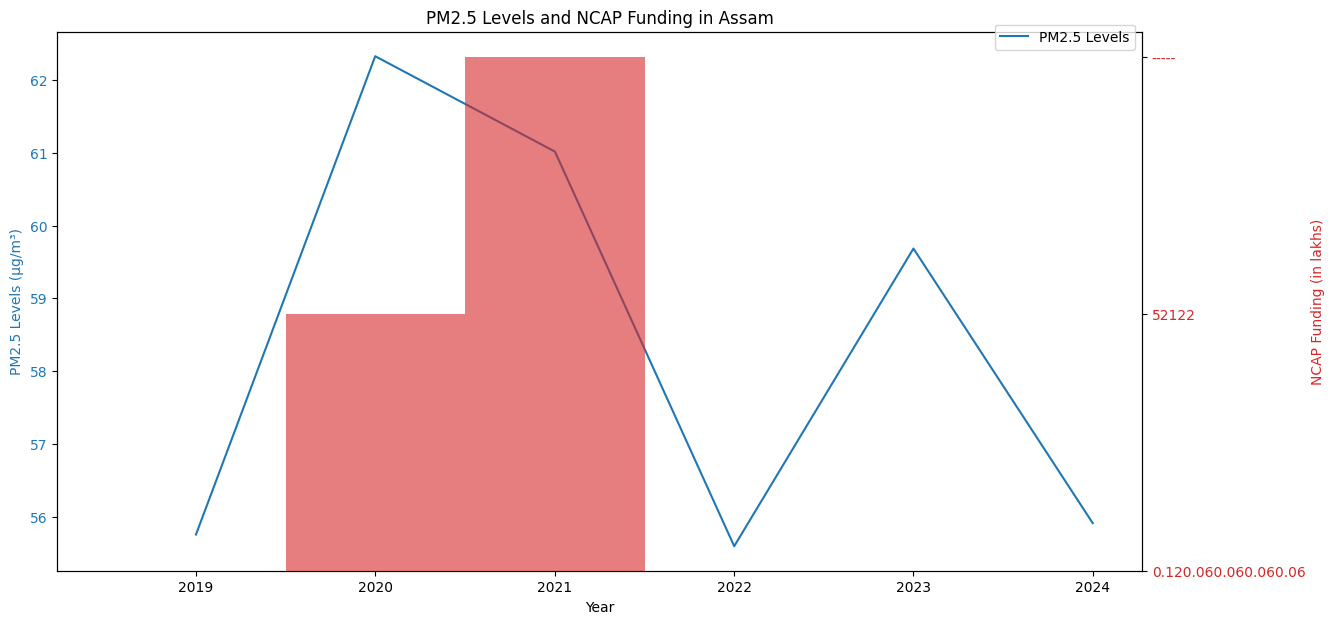

No, increment of the financing did not lead to noticeable improvements in air quality


In [81]:
import matplotlib.dates as mdates

# Load the NCAP funding data from the CSV file
ncap_funding = pd.read_csv(funding)

# Filter data for Assam
assam_data = ncap_funding[ncap_funding['State'] == 'Assam']

# Calculate total funding per year for Assam
assam_funding = {
    '2019': assam_data['Amount released during FY 2019-20'].sum(),
    '2020': assam_data['Amount released during FY 2020-21'].sum(),
    '2021': assam_data['Amount released during FY 2021-22'].sum()
}

# Convert funding data to a DataFrame for easier plotting
funding_df = pd.DataFrame(list(assam_funding.items()), columns=['Year', 'Funding (in lakhs)'])
funding_df['Year'] = pd.to_datetime(funding_df['Year'], format='%Y')

# Load the PM2.5 data from the CSV file
pm25_data = pd.read_csv(data)

# Convert 'Timestamp' column to datetime objects
pm25_data['Timestamp'] = pd.to_datetime(pm25_data['Timestamp'], format='%Y-%m-%d')

# Extract year from Timestamp
pm25_data['Year'] = pm25_data['Timestamp'].dt.year

# Filter PM2.5 data for Assam
assam_pm25_data = pm25_data[pm25_data['state'] == 'Assam']

# Group by year and calculate the mean PM2.5 level
annual_pm25 = assam_pm25_data.groupby('Year')['PM2.5'].mean().reset_index()

# Convert 'Year' column to datetime objects
annual_pm25['Year'] = pd.to_datetime(annual_pm25['Year'], format='%Y')

# Create the time series plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot PM2.5 levels
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5 Levels (µg/m³)', color=color)
ax1.plot(annual_pm25['Year'], annual_pm25['PM2.5'], color=color, label='PM2.5 Levels')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for funding
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('NCAP Funding (in lakhs)', color=color)
ax2.bar(funding_df['Year'], funding_df['Funding (in lakhs)'], color=color, alpha=0.6, width=365)
ax2.tick_params(axis='y', labelcolor=color)

# Set plot title and labels
plt.title('PM2.5 Levels and NCAP Funding in Assam')

# Show legend
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))

# Define a custom date formatter
date_format = mdates.DateFormatter("%Y")
ax1.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_major_formatter(date_format)

# Show the plot
plt.show()

print("No, increment of the financing did not lead to noticeable improvements in air quality")

##### Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


Funding Data Columns: Index(['S. No.', 'State', 'City', 'Amount released during FY 2019-20',
       'Amount released during FY 2020-21',
       'Amount released during FY 2021-22', 'Total fund released',
       'Utilisation as on June 2022'],
      dtype='object')
State Data Columns: Index(['State', 'Population', 'Area (km2)'], dtype='object')


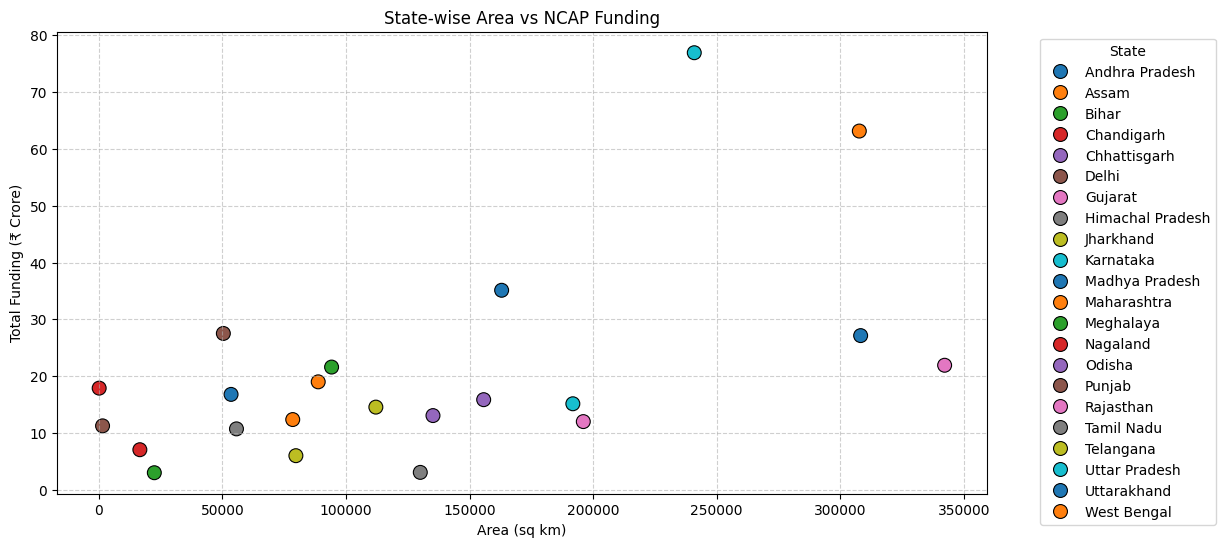

In [82]:
funding_data = pd.read_csv(funding)
state_data = pd.read_csv(state)

print("Funding Data Columns:", funding_data.columns)
print("State Data Columns:", state_data.columns)

funding_data.columns = funding_data.columns.str.strip().str.lower()
state_data.columns = state_data.columns.str.strip().str.lower()

funding_data = funding_data.rename(columns={"total fund released": "total funding"})
state_data = state_data.rename(columns={"area (km2)": "area (sq km)"})

funding_data = funding_data.groupby("state", as_index=False)["total funding"].sum()

merged_data = pd.merge(funding_data, state_data, on="state", how="inner")

if "area (sq km)" in merged_data.columns and "total funding" in merged_data.columns:
    merged_data = merged_data[["state", "area (sq km)", "total funding"]].dropna()
    merged_data["total funding"] = pd.to_numeric(merged_data["total funding"], errors="coerce")
    merged_data["area (sq km)"] = pd.to_numeric(merged_data["area (sq km)"], errors="coerce")

    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=merged_data, 
        x="area (sq km)", 
        y="total funding", 
        hue="state", 
        palette="tab10", 
        s=100, 
        edgecolor="black"
    )

    plt.xlabel("Area (sq km)")
    plt.ylabel("Total Funding (₹ Crore)")
    plt.title("State-wise Area vs NCAP Funding")
    plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.show()

## Miscellaneous Questions [5 Marks]


##### For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]


In [83]:
df = pd.read_csv(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce') 
df = df[df['Timestamp'].dt.year == 2023]

df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce') 
df = df.dropna(subset=['PM2.5', 'city'])

city_avg = df.groupby('city')['PM2.5'].mean()

most_polluted_city = city_avg.idxmax()
highest_avg_pm25 = city_avg.max()

hazardous_days = df[(df['city'] == most_polluted_city) & (df['PM2.5'] > 300)]

total_days = len(df[df['city'] == most_polluted_city])
num_hazardous_days = len(hazardous_days)
percentage_hazardous = (num_hazardous_days / total_days) * 100 if total_days > 0 else 0

print(f"Most polluted city: {most_polluted_city} (Average PM2.5: {highest_avg_pm25:.2f})")
print(f"Percentage of days with PM2.5 levels above Hazardous threshold: {percentage_hazardous:.2f}%")


Most polluted city: Darbhanga (Average PM2.5: 242.92)
Percentage of days with PM2.5 levels above Hazardous threshold: 23.08%


##### Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]


Average PM2.5 during Diwali: 167.44
Average PM2.5 during New Year: 182.39
Average PM2.5 during Regular months: 83.69


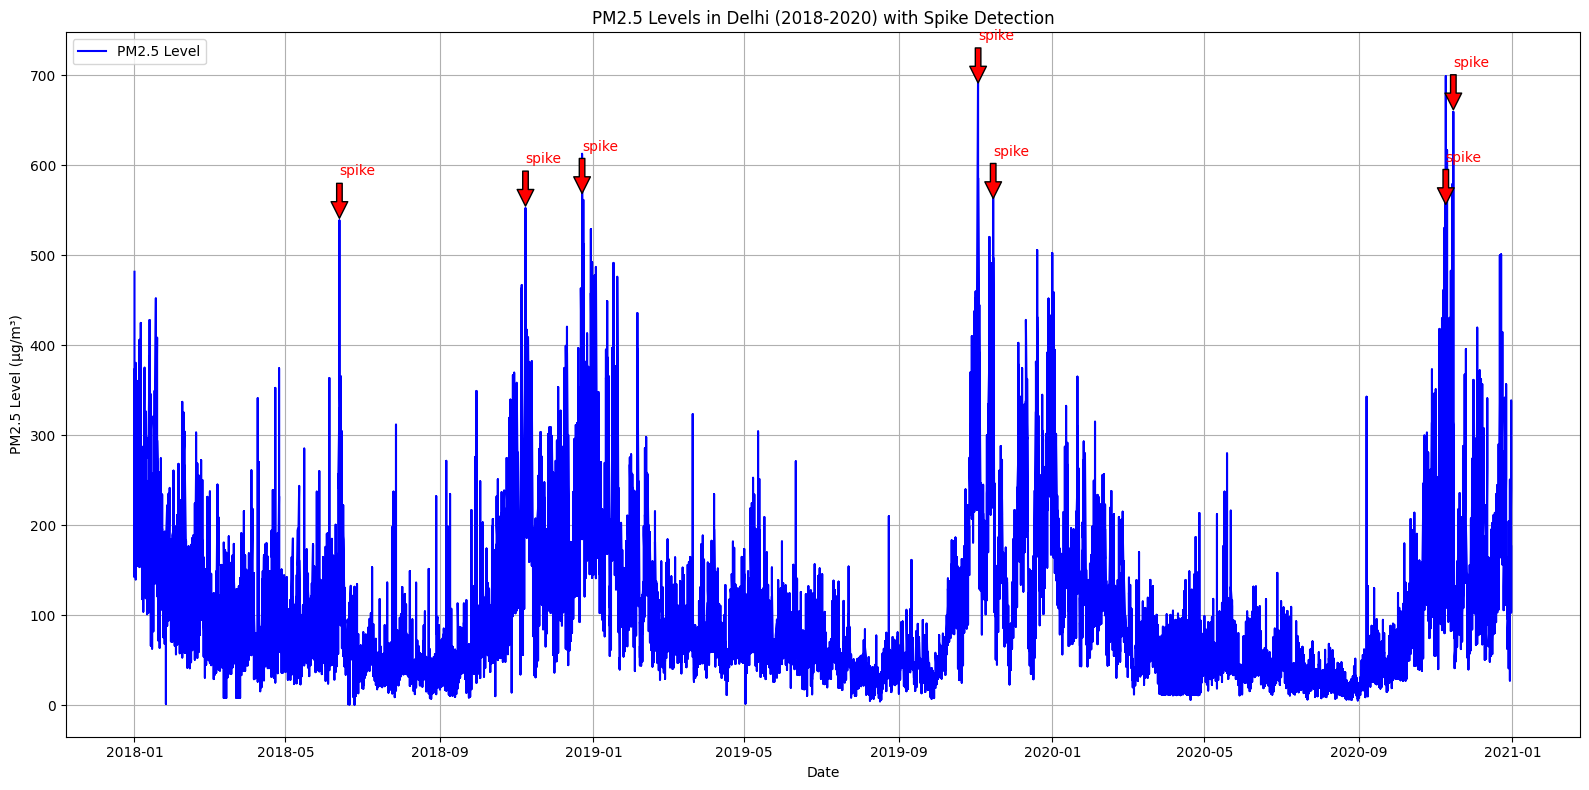

Yes, Significant pollution spike observed during Diwali
Yes, Significant pollution spike observed during New Year


In [84]:
df = pd.read_csv(data)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
df = df.dropna(subset=['Timestamp', 'PM2.5', 'city'])
df = df[df['city'] == 'Delhi']
df = df[(df['Timestamp'].dt.year >= 2018) & (df['Timestamp'].dt.year <= 2020)]

df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year
df['Date'] = df['Timestamp'].dt.date

def is_diwali(month):
    return month in [10, 11] 

def is_new_year(month):
    return month == 1 

df['Diwali'] = df['Month'].apply(is_diwali)
df['NewYear'] = df['Month'].apply(is_new_year)
df['Regular'] = ~(df['Diwali'] | df['NewYear'])

diwali_pm25 = df[df['Diwali']]['PM2.5'].mean()
newyear_pm25 = df[df['NewYear']]['PM2.5'].mean()
regular_pm25 = df[df['Regular']]['PM2.5'].mean()

print(f"Average PM2.5 during Diwali: {diwali_pm25:.2f}")
print(f"Average PM2.5 during New Year: {newyear_pm25:.2f}")
print(f"Average PM2.5 during Regular months: {regular_pm25:.2f}")

plt.figure(figsize=(16, 8))
plt.plot(df['Timestamp'], df['PM2.5'], label='PM2.5 Level', color='blue')

threshold = df['PM2.5'].mean() + 5 * df['PM2.5'].std() 
spikes = df[df['PM2.5'] > threshold].sort_values(by='Timestamp')

# Ensure spikes are not too close to each other
min_gap = pd.Timedelta(days=5)  
last_spike_time = None  

for index, row in spikes.iterrows():
    if last_spike_time is None or (row['Timestamp'] - last_spike_time) > min_gap:
        plt.annotate('spike', 
                     xy=(row['Timestamp'], row['PM2.5']), 
                     xytext=(row['Timestamp'], row['PM2.5'] + 50),
                     arrowprops=dict(facecolor='red', shrink=0.05),
                     fontsize=10, color='red')
        last_spike_time = row['Timestamp']

plt.xlabel('Date')
plt.ylabel('PM2.5 Level (µg/m³)')
plt.title('PM2.5 Levels in Delhi (2018-2020) with Spike Detection')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

if diwali_pm25 > regular_pm25 * 1.2:
    print("Yes, Significant pollution spike observed during Diwali")
else:
    print("No, Significant pollution spike is not observed during Diwali")

if newyear_pm25 > regular_pm25 * 1.2:
    print("Yes, Significant pollution spike observed during New Year")
else:
    print("No, Significant pollution spike is not observed during New Year")


##### Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.[1 Mark]


The state with the highest NCAP funding in FY 2020-21 is Andhra Pradesh with 17.28

Yearly Average PM2.5 Levels:
Timestamp
2017    46.966870
2018    38.158007
2019    33.899712
2020    30.425130
2021    33.316491
2022    34.334527
2023    36.294259
2024    33.274945
Name: PM2.5, dtype: float64

PM2.5 level change from 2020 to 2023: -5.87
Percentage change in PM2.5 level from 2020 to 2023: -19.29%
No significant air pollution improvement observed.


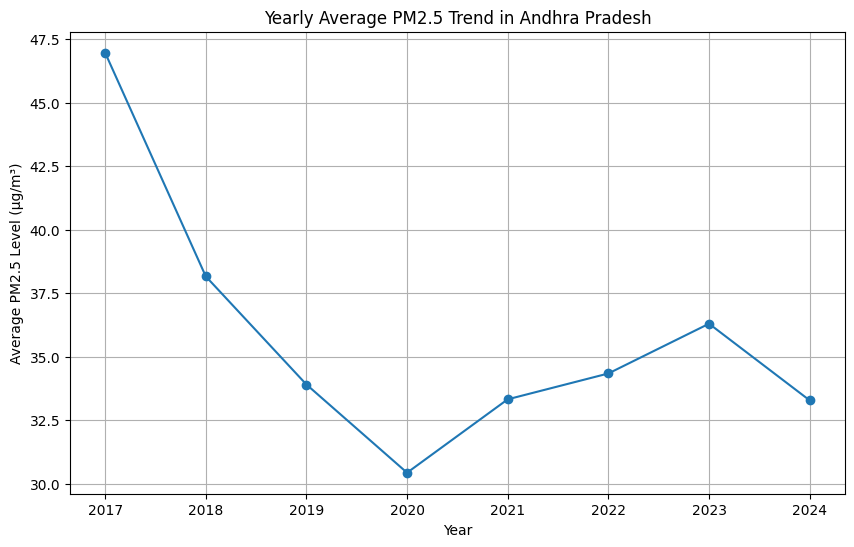

In [85]:
df_pm25 = pd.read_csv(data)

df_funding = pd.read_csv(funding)

df_funding['Amount released during FY 2020-21'] = pd.to_numeric(df_funding['Amount released during FY 2020-21'], errors='coerce').fillna(0)
state_funding_2020 = df_funding.groupby('State')['Amount released during FY 2020-21'].sum()
most_funded_state = state_funding_2020.idxmax()
highest_funding = state_funding_2020.max()

print(f"The state with the highest NCAP funding in FY 2020-21 is {most_funded_state} with {highest_funding:.2f}")

df_pm25['Timestamp'] = pd.to_datetime(df_pm25['Timestamp'], errors='coerce')
df_pm25['PM2.5'] = pd.to_numeric(df_pm25['PM2.5'], errors='coerce')
df_pm25 = df_pm25.dropna(subset=['Timestamp', 'PM2.5', 'state'])

df_state = df_pm25[df_pm25['state'] == most_funded_state]
if df_state.empty:
    print(f"No PM2.5 data available for {most_funded_state}")
    exit()

yearly_avg_pm25 = df_state.groupby(df_state['Timestamp'].dt.year)['PM2.5'].mean()

print("\nYearly Average PM2.5 Levels:")
print(yearly_avg_pm25)

if 2023 in yearly_avg_pm25.index and 2020 in yearly_avg_pm25.index:
    pm25_2020 = yearly_avg_pm25.get(2020, None)
    pm25_2023 = yearly_avg_pm25.get(2023, None)

    if pm25_2020 is not None and pm25_2023 is not None:
        improvement = pm25_2020 - pm25_2023
        percent_change = (improvement / pm25_2020) * 100 if pm25_2020 != 0 else 0

        print(f"\nPM2.5 level change from 2020 to 2023: {improvement:.2f}")
        print(f"Percentage change in PM2.5 level from 2020 to 2023: {percent_change:.2f}%")

        if percent_change > 10:  # Example threshold: 10% improvement
            print("Significant air pollution improvement observed.")
        else:
            print("No significant air pollution improvement observed.")
    else:
        print("PM2.5 data missing for 2020 or 2023, cannot determine improvement.")
else:
    print("PM2.5 data missing for 2020 or 2023, cannot determine improvement.")

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25.index, yearly_avg_pm25.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level (µg/m³)')
plt.title(f'Yearly Average PM2.5 Trend in {most_funded_state}')
plt.grid(True)
plt.show()

##### Draw the map of India and plot the sensor locations on the map.[1.5 Mark]

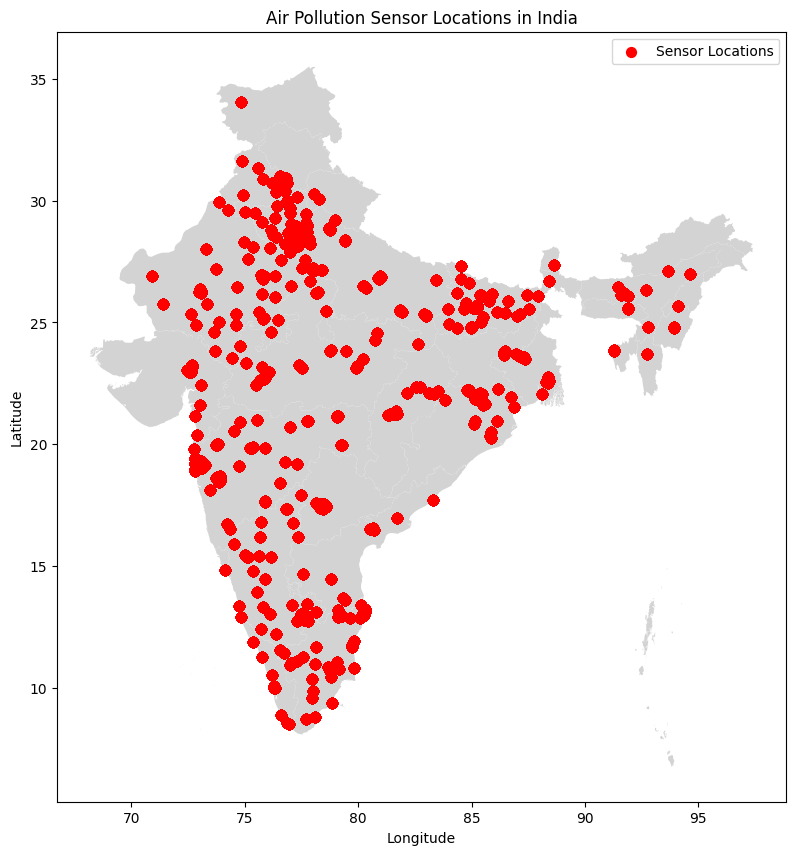

In [86]:
import geopandas

df = pd.read_csv(data)

map_plot_data = df.copy()
map_plot_data['latitude'] =  pd.to_numeric(map_plot_data['latitude'], errors='coerce')
map_plot_data['longitude'] =  pd.to_numeric(map_plot_data['longitude'], errors='coerce')
map_plot_data = map_plot_data.dropna(subset=['latitude', 'longitude'])
gdf = geopandas.GeoDataFrame(
    map_plot_data,
    geometry=geopandas.points_from_xy(map_plot_data.longitude, map_plot_data.latitude),
    crs='EPSG:4326',
)  
india = geopandas.read_file(r"D:\IIT Gandhinagar\Semester 2\ES 114\Assignement3\gadm41_IND_1.shx")  
india = india.to_crs(
    'EPSG:4326'
)  


fig, ax = plt.subplots(1, figsize=(10, 10))
india.plot(color='lightgray', ax=ax)  # Plot India map
gdf.plot(ax=ax, color='red', markersize=50, label='Sensor Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Air Pollution Sensor Locations in India')
ax.legend()

plt.show()

## Tell us something new [1 Mark]


##### Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 



In [87]:
df_funding = pd.read_csv(funding)

cols_to_clean = ['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']
for col in cols_to_clean:
    df_funding[col] = df_funding[col].replace({'-': 0}).astype(float)

state_funding = df_funding.groupby('State')[cols_to_clean].sum()

top_5_states = state_funding['Amount released during FY 2020-21'].nlargest(5) #Changed the aggregation

print("\nTop 5 States Receiving Funding in FY 2020-21 and their Funding Received are:")
print(top_5_states)
print("The Top 5 States that received the most funding in FY 2020-21 is an interesting observation")


Top 5 States Receiving Funding in FY 2020-21 and their Funding Received are:
State
Andhra Pradesh    17.28
Punjab            15.04
West Bengal       13.00
Uttar Pradesh     12.16
Assam             12.00
Name: Amount released during FY 2020-21, dtype: float64
The Top 5 States that received the most funding in FY 2020-21 is an interesting observation
